In [37]:
import nltk; nltk.download('stopwords')
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gnishimura/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
speech_data = pd.read_csv('speech_data.txt', header=None)[0]

In [61]:
from pymongo import MongoClient
import requests
import time
import random
import re
from bs4 import BeautifulSoup
from datetime import datetime
from pprint import pprint

In [4]:
# Scrape dates
# website = "http://www.americanrhetoric.com/barackobamaspeeches.htm"
# r = requests.get(website)
# page_data = BeautifulSoup(r.content, features='lxml')
# date_data = page_data.find_all("font", {"face": "Tahoma", "size":"4"})


In [5]:
# Clean html
# dates = re.sub('<[^<]+?>', '', str(date_data))

In [26]:
# Compile dataset 
# obama_speech_df = pd.DataFrame([*zip(dates[1:-1].split(','), speech_data)])

In [28]:
# obama_speech_df.rename(columns={0:'dates', 1:'speeches'}, inplace=True)

In [29]:
# Convert to datetime
# obama_speech_df['dates'] = pd.to_datetime(obama_speech_df['dates'], infer_datetime_format=True)

In [58]:
# Save file
# obama_speech_df.to_csv('obama_speech_df.txt')

In [8]:
obama_speech_df = pd.read_csv('obama_speech_df.txt')
#obama_speech_df.drop(columns='Unnamed: 0', inplace=True)
obama_speech_df

,dates,speeches
0,2002-10-02,[Good afternoon. Let begin by saying that alth...
1,2004-07-27,"[On behalf of the great state of Illinois, cro..."
2,2005-01-06,"[Thank you very much, Mr. President; Ladies an..."
3,2005-06-04,"[Good morning President Taylor, Board of Trust..."
4,2005-10-25,"[Mr. President, today the nation mourns a genu..."
5,2005-12-15,"[Thank you very much, Mr. President. You know,..."
6,2006-01-31,"[Thank you very much, Mr. President. Today, we..."
7,2006-07-20,"[Mr. President, I rise today both humbled and ..."
8,2007-01-16,"[As many of you know, over the last few months..."
9,2007-02-10,[Hello Springfield! ...Look at all of you. Loo...


In [9]:
obama_pre_pres = obama_speech_df[obama_speech_df['dates'] < '2009-01-01']

In [10]:
obama_first_term = obama_speech_df.query('"2013-01-01" > dates > "2009-01-01"')

In [11]:
obama_second_term = obama_speech_df[obama_speech_df['dates'] > '2013-01-01']

In [12]:
len(obama_pre_pres) + len(obama_first_term) + len(obama_second_term)

463

In [19]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [24]:
ppd = obama_pre_pres.speeches.values.tolist()

In [84]:
print(ppd[:1])

['[Good afternoon. Let begin by saying that although this has been billed as an anti-war rally, I stand before you as someone who is not opposed to war in all circumstances. The Civil War was one of the bloodiest in history, and yet it was only through the crucible of the sword, the sacrifice of multitudes, that we could begin to perfect this union, and drive the scourge of slavery from our soil. I don’t oppose all wars. My grandfather signed up for a war the day after Pearl Harbor was bombed, fought in Patton’s army. He saw the dead and dying across the fields of Europe; he heard the stories of fellow troops who first entered Auschwitz and Treblinka. He fought in the name of a larger freedom, part of that arsenal of democracy that triumphed over evil, and he did not fight in vain. I don’t oppose all wars. After September 11th, after witnessing the carnage and destruction, the dust and the tears, I supported this Administration’s pledge to hunt down and root out those who would slaught

In [27]:
# Convert all pre-presidential speeches to a list
# pre_pres_text = ('\n'.join(obama_pre_pres['speeches']))
# print(pre_pres_text[:5])

### Prepare stopwords

In [41]:
# NLTK Stopwords

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

### Tokenize

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) #deacc=True removes punc

pre_pres_words = list(sent_to_words(ppd))
print(pre_pres_words[:5])

[['good', 'afternoon', 'let', 'begin', 'by', 'saying', 'that', 'although', 'this', 'has', 'been', 'billed', 'as', 'an', 'anti', 'war', 'rally', 'stand', 'before', 'you', 'as', 'someone', 'who', 'is', 'not', 'opposed', 'to', 'war', 'in', 'all', 'circumstances', 'the', 'civil', 'war', 'was', 'one', 'of', 'the', 'bloodiest', 'in', 'history', 'and', 'yet', 'it', 'was', 'only', 'through', 'the', 'crucible', 'of', 'the', 'sword', 'the', 'sacrifice', 'of', 'multitudes', 'that', 'we', 'could', 'begin', 'to', 'perfect', 'this', 'union', 'and', 'drive', 'the', 'scourge', 'of', 'slavery', 'from', 'our', 'soil', 'don', 'oppose', 'all', 'wars', 'my', 'grandfather', 'signed', 'up', 'for', 'war', 'the', 'day', 'after', 'pearl', 'harbor', 'was', 'bombed', 'fought', 'in', 'patton', 'army', 'he', 'saw', 'the', 'dead', 'and', 'dying', 'across', 'the', 'fields', 'of', 'europe', 'he', 'heard', 'the', 'stories', 'of', 'fellow', 'troops', 'who', 'first', 'entered', 'auschwitz', 'and', 'treblinka', 'he', 'fou

### Create Bigram and Trigram Models

In [29]:
bigram = gensim.models.Phrases(pre_pres_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[pre_pres_words], threshold=100)

In [31]:
# faster way to get tri/bigrams?

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [40]:
print(trigram_mod[bigram_mod[pre_pres_words[2]]])

['thank', 'you', 'very_much', 'mr_president', 'ladies', 'and', 'gentlemen', 'of', 'the', 'senate', 'have', 'to', 'say', 'that', 'didn', 'anticipate', 'speaking', 'today', 'but', 'the', 'importance', 'think', 'of', 'this', 'issue', 'is', 'one', 'in', 'which', 'feel', 'it', 'important', 'for', 'me', 'to', 'address', 'this', 'body', 'you', 'know', 'during', 'the', 'election', 'had', 'the', 'occasion', 'of', 'meeting', 'woman', 'who', 'had', 'supported', 'me', 'in', 'my', 'campaign', 'and', 'she', 'decided', 'to', 'come', 'to', 'shake', 'my', 'hand', 'and', 'take', 'photograph', 'wonderful', 'woman', 'she', 'wasn', 'asking', 'for', 'anything', 'and', 'was', 'very', 'grateful', 'that', 'she', 'took', 'time', 'to', 'come', 'by', 'it', 'was', 'unexceptional', 'moment', 'except', 'for', 'the', 'fact', 'that', 'she', 'was', 'born', 'in', 'and', 'her', 'name', 'was', 'marguerite', 'lewis', 'an', 'african_american', 'woman', 'who', 'had', 'been', 'born', 'in', 'louisiana', 'born', 'in', 'the', 's

### Remove Stopwords, Make Tri/Bigrams, Lemmatize

In [35]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out




In [89]:
# Remove stop words
ppw_nostops = remove_stopwords(pre_pres_words)

# Form bigrams
ppw_bigrams = make_bigrams(ppw_nostops)

# Initialize spacy 'en' model, keep the tagger component for efficiency
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
ppw_lemmatized = lemmatization(ppw_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(ppw_lemmatized[:1])


[['good', 'afternoon', 'let', 'begin', 'say', 'bill', 'anti', 'war', 'rally', 'stand', 'someone', 'oppose', 'war', 'circumstance', 'civil', 'war', 'bloodiest', 'history', 'crucible', 'sword', 'sacrifice', 'multitude', 'could', 'begin', 'perfect_union', 'drive', 'scourge', 'slavery', 'soil', 'oppose', 'war', 'grandfather', 'sign', 'war', 'day', 'pearl', 'harbor', 'bomb', 'fight', 'patton', 'army', 'see', 'dead', 'die', 'field', 'europe', 'hear', 'story', 'fellow', 'troop', 'first', 'enter', 'auschwitz', 'treblinka', 'fight', 'name', 'large', 'freedom', 'part', 'arsenal', 'democracy', 'triumph', 'evil', 'fight', 'vain', 'oppose', 'war', 'september', 'witness', 'carnage', 'destruction', 'dust', 'tear', 'support', 'administration', 'pledge', 'hunt', 'root', 'would', 'slaughter', 'innocent', 'name', 'intolerance', 'would', 'willingly', 'take', 'arm', 'prevent', 'tragedy', 'happen', 'oppose', 'war', 'circumstance', 'look', 'crowd', 'today', 'know', 'shortage', 'patriot', 'patriotism', 'oppos

### Create Dictionary and Corpus for Topic Modeling

In [45]:
# Create Dictionary
id2word = corpora.Dictionary(ppw_lemmatized)

# Create Corpus
texts = ppw_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

print(corpus[:1])

[[(0, 2), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 4), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 3), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 4), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 3), (41, 1), (42, 1), (43, 1), (44, 1), (45, 2), (46, 1), (47, 1), (48, 1), (49, 2), (50, 2), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 3), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 12), (100, 1), (101, 1), (102, 1), (103, 1), (104, 2), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110, 2

In [46]:
# Check to make sure these correspond to words
id2word[0]

'administration'

In [47]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('administration', 2),
  ('afternoon', 1),
  ('agenda', 1),
  ('allow', 1),
  ('ally', 2),
  ('already', 1),
  ('also', 1),
  ('anti', 1),
  ('arab', 1),
  ('arm', 4),
  ('army', 1),
  ('arsenal', 1),
  ('attempt', 2),
  ('auschwitz', 1),
  ('away', 1),
  ('awful', 1),
  ('bad', 2),
  ('base', 1),
  ('battle', 3),
  ('bear', 1),
  ('begin', 2),
  ('better', 1),
  ('bill', 1),
  ('biological', 1),
  ('blindly', 1),
  ('blood', 1),
  ('bloodiest', 1),
  ('bomb', 1),
  ('brutal', 1),
  ('bush', 4),
  ('butcher', 1),
  ('call', 1),
  ('capacity', 1),
  ('carnage', 1),
  ('cell', 1),
  ('chair', 1),
  ('chemical', 1),
  ('child', 1),
  ('circumstance', 2),
  ('civil', 1),
  ('clear', 3),
  ('code', 1),
  ('color', 1),
  ('community', 1),
  ('concert', 1),
  ('consequence', 2),
  ('contain', 1),
  ('coordinated', 1),
  ('corporate', 1),
  ('corruption', 2),
  ('cost', 2),
  ('could', 1),
  ('countless', 1),
  ('country', 1),
  ('covet', 1),
  ('crowd', 1),
  ('crucible', 1),
  ('current', 

### Building the Topic Model

In [53]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus,
                                           id2word = id2word,
                                           num_topics = 20,
                                           random_state = 20,
                                           update_every = 1,
                                           chunksize = 100,
                                           passes = 10,
                                           alpha = 'auto',
                                           per_word_topics = True)

In [64]:
pprint(lda_model.print_topics())


[(0,
  '0.017*"housing" + 0.012*"home" + 0.011*"board" + 0.010*"crisis" + '
  '0.009*"old" + 0.009*"shaun" + 0.009*"work" + 0.009*"effort" + '
  '0.009*"economy" + 0.008*"city"'),
 (1,
  '0.013*"american" + 0.010*"america" + 0.009*"time" + 0.009*"work" + '
  '0.009*"new" + 0.009*"make" + 0.008*"people" + 0.008*"change" + '
  '0.008*"country" + 0.007*"know"'),
 (2,
  '0.024*"economic" + 0.018*"crisis" + 0.016*"work" + 0.014*"economy" + '
  '0.011*"policy" + 0.010*"job" + 0.009*"family" + 0.009*"financial" + '
  '0.008*"help" + 0.007*"middle_class"'),
 (3,
  '0.004*"disastrous" + 0.004*"doubted" + 0.004*"ingrain" + 0.004*"drama" + '
  '0.004*"fluke" + 0.004*"diverse" + 0.004*"admiration" + 0.004*"skidmore" + '
  '0.004*"pete" + 0.004*"medicaid"'),
 (4,
  '0.017*"system" + 0.015*"immigrant" + 0.013*"work" + 0.011*"worker" + '
  '0.010*"family" + 0.010*"year" + 0.009*"must" + 0.009*"point" + 0.008*"go" + '
  '0.008*"country"'),
 (5,
  '0.012*"american" + 0.012*"new" + 0.011*"serve" + 0.011

In [51]:
doc_lda = lda_model[corpus]

### Compute Model Perplexity and Coherence Score to Evaluate Model

In [55]:
# Compute Perplexity - Measure of how good the model is, lower the better
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score 
coherence_model_lda = CoherenceModel(model=lda_model, 
                                    texts=ppw_lemmatized, 
                                    dictionary=id2word,
                                    coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.6896346079476965

Coherence Score:  0.3129806575777577


### Visualize the topics-keywords

In [74]:
# Visualize Topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/Users/gnishimura/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.168243 -0.000507       1        1  24.966793
8     -0.096890 -0.000457       2        1  19.698992
17    -0.145177  0.027986       3        1  12.617900
18    -0.111749  0.070112       4        1   8.467031
7     -0.123195 -0.036039       5        1   7.476150
5     -0.105161 -0.085433       6        1   6.521076
11    -0.122499  0.081551       7        1   5.136146
2     -0.054143 -0.215357       8        1   4.377092
6     -0.076540  0.140110       9        1   3.565813
4     -0.024273 -0.038094      10        1   2.182703
12     0.046429  0.106266      11        1   1.949481
0      0.032312 -0.104216      12        1   1.507413
16     0.121197 -0.089165      13        1   1.109512
19     0.093283  0.061647      14        1   0.369031
3      0.131323  0.017479      15        1   0.040656
13     0.105592  0.016784      16        1   0.002960
14     0.127335  0.011538      17        1   0.002833
10     0.119085  0.010719      18        1   0.002821
15     0.124169  0.012921      19        1   0.002811
9      0.127145  0.012154      20        1   0.002790, topic_info=     Category        Freq        Term       Total  loglift  logprob
term                                                               
313   Default  178.000000       world  178.000000  30.0000  30.0000
124   Default  113.000000        hope  113.000000  29.0000  29.0000
200   Default  251.000000      people  251.000000  28.0000  28.0000
109   Default  148.000000          go  148.000000  27.0000  27.0000
312   Default  253.000000        work  253.000000  26.0000  26.0000
242   Default  154.000000         say  154.000000  25.0000  25.0000
1191  Default  216.000000         new  216.000000  24.0000  24.0000
599   Default  166.000000        must  166.000000  23.0000  23.0000
594   Default   73.000000      moment   73.000000  22.0000  22.0000
388   Default  178.000000        come  178.000000  21.0000  21.0000
80    Default   95.000000     economy   95.000000  20.0000  20.0000
177   Default  169.000000        need  169.000000  19.0000  19.0000
333   Default  304.000000    american  304.000000  18.0000  18.0000
332   Default  255.000000     america  255.000000  17.0000  17.0000
302   Default  176.000000         war  176.000000  16.0000  16.0000
1037  Default   74.000000    economic   74.000000  15.0000  15.0000
261   Default  115.000000       stand  115.000000  14.0000  14.0000
404   Default   58.000000      crisis   58.000000  13.0000  13.0000
486   Default  147.000000         get  147.000000  12.0000  12.0000
461   Default  102.000000      family  102.000000  11.0000  11.0000
53    Default  203.000000     country  203.000000  10.0000  10.0000
145   Default  109.000000        iraq  109.000000   9.0000   9.0000
1219  Default   76.000000        plan   76.000000   8.0000   8.0000
150   Default  223.000000        know  223.000000   7.0000   7.0000
1107  Default  106.000000        help  106.000000   6.0000   6.0000
377   Default  127.000000      change  127.000000   5.0000   5.0000
176   Default  145.000000      nation  145.000000   4.0000   4.0000
158   Default  233.000000        make  233.000000   3.0000   3.0000
1029  Default   39.000000          do   39.000000   2.0000   2.0000
112   Default  110.000000       great  110.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
302   Topic20    0.000461         war  176.451263  -2.3682  -7.6645
333   Topic20    0.000465    american  304.833771  -2.9065  -7.6561
313   Topic20    0.000424       world  178.423370  -2.4622  -7.7474
200   Topic20    0.000440      people  251.262817  -2.7690  -7.7118
758   Topic20    0.000433        time  228.055450  -2.6868  -7.7265
109   Topic20    0.000409          go  148.791092  -2.3173  -7.7841
150   Topic20    0.000418        know  223.902176  -2.7051  -7.7632
332   Topic20    0.000417     america  255.223724

### Improve Gensim's model by using the Mallet version

In [58]:
mallet_path = 'mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [63]:
# Show topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=ppw_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
pprint('\nCoherence Score: ', coherence_ldamallet)

[(4,
  [('world', 0.037479630635524175),
   ('security', 0.03204780010863661),
   ('afghanistan', 0.024443237370994023),
   ('threat', 0.018468223791417708),
   ('global', 0.016295491580662683),
   ('face', 0.015752308527973928),
   ('future', 0.015209125475285171),
   ('ally', 0.015209125475285171),
   ('challenge', 0.014665942422596416),
   ('nuclear', 0.014665942422596416)]),
 (3,
  [('war', 0.09407452657299939),
   ('iraq', 0.06902871105681124),
   ('troop', 0.02565668906536347),
   ('strategy', 0.02504581551618815),
   ('iraqi', 0.021380574221136223),
   ('fight', 0.01832620647525962),
   ('effort', 0.01710445937690898),
   ('threat', 0.016493585827733658),
   ('political', 0.015271838729383017),
   ('clear', 0.015271838729383017)]),
 (19,
  [('life', 0.06267605633802817),
   ('face', 0.03309859154929577),
   ('call', 0.02464788732394366),
   ('find', 0.022535211267605635),
   ('back', 0.022535211267605635),
   ('government', 0.022535211267605635),
   ('education', 0.0197183098591

AttributeError: 'numpy.float64' object has no attribute 'write'

### How to find optimal number of topics

In [65]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """Computes c_v coherence for various numbers of topics.
    
    Parameters:
    ------------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    
    Returns:
    ------------
    model_list : List of LDA topic models
    coherence_values: Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [66]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=ppw_lemmatized, 
                                                        start=2, limit=30, step = 4)

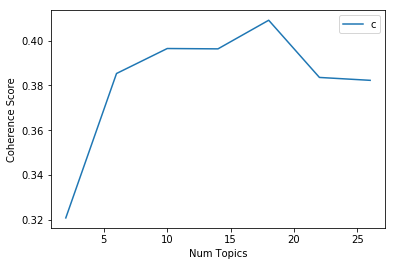

In [68]:
# Show graph 

limit=30
start=2
step=4
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [70]:
# Print coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics = ", m, " has Coherence Value of", round(cv, 4))

Num Topics =  2  has Coherence Value of 0.3208
Num Topics =  6  has Coherence Value of 0.3854
Num Topics =  10  has Coherence Value of 0.3965
Num Topics =  14  has Coherence Value of 0.3964
Num Topics =  18  has Coherence Value of 0.4092
Num Topics =  22  has Coherence Value of 0.3836
Num Topics =  26  has Coherence Value of 0.3823


In [79]:
# Select the optimum model
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.021*"work" + 0.021*"economy" + 0.017*"plan" + 0.016*"economic" + '
  '0.016*"job" + 0.014*"challenge" + 0.013*"crisis" + 0.013*"american" + '
  '0.013*"policy" + 0.011*"create"'),
 (1,
  '0.020*"today" + 0.019*"day" + 0.017*"life" + 0.017*"give" + 0.016*"face" + '
  '0.015*"good" + 0.015*"begin" + 0.012*"understand" + 0.012*"lead" + '
  '0.012*"call"'),
 (2,
  '0.031*"war" + 0.025*"world" + 0.020*"iraq" + 0.015*"make" + 0.013*"people" '
  '+ 0.013*"america" + 0.012*"terrorist" + 0.011*"threat" + 0.011*"security" + '
  '0.010*"support"'),
 (3,
  '0.024*"work" + 0.019*"year" + 0.018*"american" + 0.018*"act" + 0.014*"time" '
  '+ 0.013*"system" + 0.013*"state" + 0.011*"challenge" + 0.011*"people" + '
  '0.010*"part"'),
 (4,
  '0.031*"america" + 0.024*"american" + 0.024*"change" + 0.023*"make" + '
  '0.021*"time" + 0.019*"country" + 0.015*"people" + 0.014*"work" + '
  '0.012*"nation" + 0.012*"promise"'),
 (5,
  '0.018*"hope" + 0.017*"people" + 0.016*"country" + 0.015*"black" + '


In [80]:
optimal_model_gen = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [81]:
pyLDAvis.enable_notebook()
vis2 = pyLDAvis.gensim.prepare(optimal_model_gen, corpus, id2word)
vis2

/Users/gnishimura/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/gnishimura/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/gnishimura/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/gnishimura/anaconda/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.182661 -0.034834       1        1  19.172157
2      0.086556 -0.006510       2        1  18.718455
1     -0.334490  0.256260       3        1  18.002864
0     -0.113903 -0.185139       4        1  16.290630
5      0.244459  0.224739       5        1  14.870658
3     -0.065283 -0.254515       6        1  12.945235, topic_info=     Category        Freq          Term       Total  loglift  logprob
term                                                                 
302   Default  218.000000           war  218.000000  30.0000  30.0000
377   Default  159.000000        change  159.000000  29.0000  29.0000
332   Default  321.000000       america  321.000000  28.0000  28.0000
312   Default  323.000000          work  323.000000  27.0000  27.0000
313   Default  228.000000         world  228.000000  26.0000  26.0000
80    Default  121.000000       economy  121.000000  25.0000  25.0000
145   Default  133.000000          iraq  133.000000  24.0000  24.0000
59    Default  118.000000           day  118.000000  23.0000  23.0000
284   Default  127.000000         today  127.000000  22.0000  22.0000
566   Default  110.000000          life  110.000000  21.0000  21.0000
53    Default  261.000000       country  261.000000  20.0000  20.0000
124   Default  155.000000          hope  155.000000  19.0000  19.0000
333   Default  384.000000      american  384.000000  18.0000  18.0000
1219  Default   95.000000          plan   95.000000  17.0000  17.0000
1037  Default   94.000000      economic   94.000000  16.0000  16.0000
320   Default   83.000000           act   83.000000  15.0000  15.0000
800   Default  185.000000          year  185.000000  14.0000  14.0000
158   Default  296.000000          make  296.000000  13.0000  13.0000
488   Default  130.000000          give  130.000000  12.0000  12.0000
110   Default   94.000000          good   94.000000  11.0000  11.0000
459   Default  141.000000          face  141.000000  10.0000  10.0000
37    Default  143.000000         child  143.000000   9.0000   9.0000
20    Default   91.000000         begin   91.000000   8.0000   8.0000
357   Default   79.000000         black   79.000000   7.0000   7.0000
376   Default  140.000000     challenge  140.000000   6.0000   6.0000
200   Default  328.000000        people  328.000000   5.0000   5.0000
540   Default  168.000000           job  168.000000   4.0000   4.0000
160   Default  114.000000           man  114.000000   3.0000   3.0000
404   Default   76.000000        crisis   76.000000   2.0000   2.0000
770   Default   78.000000    understand   78.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
820    Topic6   18.044258      confront   18.044258   2.0444  -5.5321
1570   Topic6   18.044258           nee   18.044258   2.0444  -5.5321
1562   Topic6   16.841307   legislation   16.841307   2.0444  -5.6011
1736   Topic6   15.638357          fund   15.638357   2.0444  -5.6752
650    Topic6   15.638357       process   15.638357   2.0444  -5.6752
351    Topic6   15.638357        behalf   15.638357   2.0444  -5.6752
1575   Topic6   15.638357       perfect   15.638357   2.0444  -5.6752
905    Topic6   37.291466  united_state   39.712401   1.9815  -4.8061
881    Topic6   26.464911        reform   27.646354   2.0008  -5.1491
1062   Topic6   26.464911          fail   27.667234   2.0000  -5.1491
736    Topic6   57.741625         state   66.214897   1.9075  -4.3689
708    Topic6   28.870812          side   31.233699   1.9658  -5.0621
191    Topic6   46.915070          part   56.387494   1.8605  -4.5766
382    Topic6   31.276713       citizen   34.908116   1.9346  -4.9820
822    Topic6   43.306219      continue   55.499620   1.7964  -4.6566
625    Topic6   39.697367          pass   50.575284   1.8023  -4.7436
800    Topic6   86.612437          year  185.504238   1.2828  -3.9635
781    Topic6   38.494417